<a href="https://colab.research.google.com/github/MLRG-CEFET-RJ/ml-class/blob/master/ml_ppcic_dim_reduc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Curse of dimensionality

The term *curse of dimensionality* was coined by [Richard Bellman](https://en.wikipedia.org/wiki/Richard_E._Bellman) to denote the difficulty of manipulating data sets that have a very large number of attributes, or that is, they have a high dimensionality.

In the context of ML, the curse of dimensionality, also known as the *Hughes phenomenon* states that, in a data set that contains a fixed amount of samples, say 1000, the more dimensions the samples have, the more difficult is to generate an ML model.

For example, if the samples are two-dimensional, it is easy to train a decent predictive model with 1000 samples. However, when each sample contains 500 dimensions, then 1000 samples are not enough to train a decent model. This is because, to train a good predictive model, an ML algorithm has to be presented with a reasonable number of possible combinations of attribute values, in order to properly capture the patterns underlying the data. With more dimensions (i.e., more attributes), there are more possible combinations and therefore more samples are needed. The following figure illustrates this: the amount of training data needed to cover 20% of the attribute space grows exponentially with the number of dimensions.

![alt text](https://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png)

As the figure below illustrates, as the dimensionality of a data set increases, the performance of the prediction model increases until the ideal number of attributes is reached. However, further increasing the dimensionality without increasing the number of training samples results in a decrease in the performance of the model generated.

![alt text](https://www.visiondummy.com/wp-content/uploads/2014/04/dimensionality_vs_performance.png)

## Dimensionality reduction and attribute selection

The choice of attributes (features) used to train a machine learning model has a great influence on the performance that can be achieved.

Example (2D to 1D):

![alt text](https://shapeofdata.files.wordpress.com/2013/04/projection.png)

Example (3D to 2D):

![alt text](https://i.stack.imgur.com/9ETLr.png)

If the original data set contains a very large number of attributes, it is possible that there are dependencies between them. As a result, there will be more dimensions in the attribute space than the minimum required to perform any ML task. In addition, in classification or regression tasks, it is possible that there are attributes that are not relevant to infer the value of the target attribute.

In the context described above, we can consider applying techniques of *dimensionality reduction* or *feature selection* on the original data set. The purpose of these families of techniques is to reduce the number of attributes to be used when adjusting some ML model.

The difference between dimensionality reduction and attribute selection is that the set of attributes resulting from the application of the latter is a subset of the original set of attributes, while the set of attributes produced by dimensionality reduction does not need to be a subset (for example, example, the PCA reduces dimensionality by producing new attributes by linearly combining the original attributes, and then discarding the less important ones). In this way, we can understand the selection of attributes as a particular case of dimensionality reduction.

In any case, both DR and AS can be used during the pre-processing phase for later application of an estimator (i.e., of some ML model).

# Dimensionality reduction

DR's main objective is to compact a set of data, preserving most of the significant information. This compression corresponds to reducing the dimensions of the data set with minimal loss of information.

Compression facilitates the process of understanding the data, as it is expected that the reduced data representation captures the dominant sources of variation more efficiently.

The goal is to discover the "hidden variables" that can successfully expose the underlying structure of the data.

The desired result is to design an attribute space in a smaller subspace that represents the data properly. A possible application would be in a classification task, in which we want to reduce the computational costs and the classification error, reducing the number of dimensions of the attribute space.


## Mean vector

Consider a data set consisting of $m$ samples, each one an $n$-dimensional vector. That is, the corresponding data matrix $X$ contains in its rows $m$ vector columns (each with $n$ components) of the data set.

Structure of a data matrix $X$:

$$
\mathbf{X} = {
  \begin{bmatrix}
    \mathbf{x}^{(1)}\\
    \vdots \\
    \mathbf{x}^{(m)}
  \end{bmatrix}}^T = 
  {\begin{bmatrix} 
    (\mathbf{x}^{(1)})^T \\ 
    \vdots \\ 
    (\mathbf{x}^{(m)})^T 
  \end{bmatrix}}
$$

Another way to interpret the above statement is to say that a data matrix $X$ contain the $m$ column vector as rows, and each column vector has $n$ components.

$$
\mathbf{X} = {\begin{bmatrix} (\mathbf{x}^{(1)})^T \\ \vdots \\ (\mathbf{x}^{(m)})^T \end{bmatrix}}
$$

We denote the entry in the $i$-th row and $j$-th column of $X$ by $x^{(i)}_j$. We define $\mu_j$, the **mean** of the $j$-th column (feature) of $X$ as the following:

$$
{\mu_j = \displaystyle {\frac {1}{m}}\sum _{i=1}^{m}x_{j}^{(i)} } 
$$

Notice that $\mu_j \in \Re$. We can also think of $\mathbf{\mu} \in \Re^n$, the **sample mean vector** of a data matrix. The sample mean vector contains the average of the observations for each variable, and is written as the following:

$$
\mathbf{\mu} ={\frac{1}{m}}\sum _{i=1}^{m} \mathbf{x}^{(i)} = {\begin{bmatrix}{\mu}_{1}\\\vdots \\{\mu}_{j}\\\vdots \\{\mu}_{n}\end{bmatrix}}
$$

A data matrix is ​​said to be *centered* if all of its points (data vectors) have been transformed to subtract the corresponding mean vector. See the following example. Notice that centering the points in the original matrix results in them being just translated; the distances between them remain the same after the translation.



In [102]:
import numpy as np

X = np.array([[0,0],[1/2,1/2],[0,1],[1,0],[1,1]])
print('Original data matrix:\n', X)

X_centered = X - X.mean(axis=0)
print('Centered data matrix:\n', X_centered)

Original data matrix:
 [[0.  0. ]
 [0.5 0.5]
 [0.  1. ]
 [1.  0. ]
 [1.  1. ]]
Centered data matrix:
 [[-0.5 -0.5]
 [ 0.   0. ]
 [-0.5  0.5]
 [ 0.5 -0.5]
 [ 0.5  0.5]]


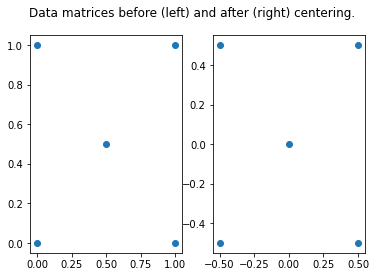

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Data matrices before (left) and after (right) centering.')

# plot data
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X_centered[:, 0], X_centered[:, 1])

## Variance and covariance

given two random variable $x$ and $y$, the covariance betewwn $x$ and $y$ as follows:

$$
\Sigma_{ij} = \mathrm{cov}(x,y)=\mathbf{E}{
  \begin{bmatrix}
  (x-\mathbf{\mu}_x)(y-\mathbf{\mu}_y)
  \end{bmatrix}}=\mathbf{E} 
  {\begin{bmatrix}x y\end{bmatrix}}-\mathbf{\mu}_{x}\mathbf{\mu}_{y}
$$

In the above expression, $\mu_x$ and $\mu_y$ are the means of $x$ and $y$, respectively, and $\mathbf{E}[\cdot]$ denotes the expected value.

In the context of a data matrix, covariance measures the linear relationship (if any) between a pair of features. For example, suppose a data matrix has two features:

* $x_i = \text{number of hours of study}$
* $x_j = \text{final grade obtained}$ 

The value $\Sigma_{ij}$ tells us whether those two variables are related, and, if so, what is the direction of such relationship.

The covariance between a random variable and itself is the *variance* of this variable. This gives us a notion of the dispersion of the values of this variable around its mean. That is, variance is a measure of the deviation (from the mean) for points in one dimension. For example, we can compute the variance of the heights of a group of individuals to see how dispersed these values are.



## Covariance matrix

It is possible to organize the values of covariances between variables (features) of a $n$-dimensional data matrix into another matrix.The so called *covariance matrix* of a data matrix $X$ has order $n \times n$. Given two attributes $x_i$ and $x_j$ in $X$, the entry $(i, j)$ in this matrix is ​​defined by $\Sigma_{ij}$.

Every covariance matrix is ​​symmetric with respect to the main diagonal, since $\text{cov}(x_i,x_j) = \text{cov}(x_j,x_i)$. The values ​​on the main diagonal of a covariance matrix correspond to the sample variances of each of the $n$ variables (features).

In a machine learning context, we will be working with [estimates of the covaviance matrix](https://en.wikipedia.org/wiki/Estimation_of_covariance_matrices), since we are going to build an approximation of the true covariance matriz considering only the samples from the data matrix $X$.

$$
\Sigma_{jk} = {\frac{1}{m-1}}\sum _{i=1}^{m}\left(x^{(i)}_{j}-{\mu}_{j}\right)\left(x^{(i)}_{k}-{\mu}_{k}\right) 
$$

The covariance matrix can be computed in a vectorized way:

$$
\Sigma =\frac{1}{m-1} X^T \, X
$$

The code cell below shows how the sample covariance matrix of a data matrix $X$ can be computed.

In [ ]:
X = np.array([[0, 2], [1, 1], [2, 0]])
m =3
print(X)

X_centered = X - X.mean(axis=0)

print('centered:')
print(X_centered)

print('cov:')
temp = X_centered.T.dot(X_centered)
temp = temp / (m-1)
print(temp)

from sklearn.covariance import EmpiricalCovariance

cov = EmpiricalCovariance().fit(temp)

print('Estimate of the covariance matrix:\n', cov.covariance_)

[[0 2]
 [1 1]
 [2 0]]
centered:
[[-1.  1.]
 [ 0.  0.]
 [ 1. -1.]]
cov:
[[ 1. -1.]
 [-1.  1.]]
Estimate of the covariance matrix:
 [[ 1. -1.]
 [-1.  1.]]


The code cell below ilustrates the difference between the real covariance matrix and the sample covariance matrix. Consider that the covariance matrix for these two variables is the following:

\begin{equation*} 
	\Sigma = \begin{bmatrix} \sigma(x,x) & \sigma(x,y) \\[0.3em] \sigma(y,x) & \sigma(y,y) \\[0.3em] \end{bmatrix}  = \begin{bmatrix} 0.8 & 0.3 \\[0.3em] 0.3 & 0.4 \\[0.3em] \end{bmatrix}
\end{equation*}

The code cell below first build a sample of 500 pais of those two normally distributed random variables. The result is a data matrix with $n=2$ features and $m = 500$ examples. In the generated plot, notice how these two variable are somewhat positively correlated. After ploting the points, the class `EmpiricalCovariance` of Scikit-Learn is used to build an estimate of the covariance matriz using these points. By comparing the real covariance matrix and its estimate, you should conclude that the latter is a good approximation of the former. 

Real covariance matrix:
 [[0.8 0.3]
 [0.3 0.4]]


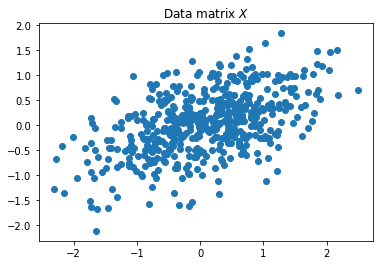

Estimate of the covariance matrix:
 [[0.75693565 0.28186631]
 [0.28186631 0.39288421]]
***
Estimate of the mean vector:
 [0.06228968 0.01937939]


In [37]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([[.8, .3],
                     [.3, .4]])

print('Real covariance matrix:\n', real_cov)

rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0], cov=real_cov, size=500)
cov = EmpiricalCovariance().fit(X)

plt.title('Data matrix $X$')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

print('Estimate of the covariance matrix:\n', cov.covariance_)
print('***')
print('Estimate of the mean vector:\n', cov.location_)

## Principal Component Analysis

Principal Components Analysis (PCA) is the most popular algorithm to perform dimensionality reduction in a unsupervised way.

Mathematically, PCA is defined as an orthogonal linear transformation that represents the data points in $X$ in a new coordinate system, so that the largest variance resides in the first coordinate (called the first principal component), the second largest variance resides in the second coordinate, and so on.

### Projection error

The new coordinate system is produced by the PCA in such a way as to minimize the **projection error** of the data on the smaller dimensional space.

Mathematically, the projection error corresponds to the sum of the squares of the distances between each data point and the surface corresponding to the smaller dimensional space for which the points must be projected.

To understand the concept of projection error, consider the following 2D data set:

![alt text](https://i.stack.imgur.com/jPw90.png)

The following animation ([source](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)) presents different lines of projections on which the set original data file (in 2D) can be designed. Each of these projection lines corresponds to a 1D dimensional space. For each projection line, each of the points located on it (points in red) corresponds to some point in the original space (points in blue).

![alt text](https://i.stack.imgur.com/Q7HIP.gif)

For a given projection line $R$, if we compute the square of the distance between each red point and the corresponding blue point (i.e., the lengths of the straight line segments in red) and add all these distances, we obtain the projection error related to the line $R$. In this example, note that

* each projection line has its corresponding projection error.
* each of these lines defines a new space determined by a vector (which defines the direction of the line).
* the line that corresponds to the maximum data gap is the same that corresponds to the minimum projection error value.

The objective of the PCA is to find the direction (s) of projection corresponding to the minimum possible projection error.

### Formalization

* 2 dimensions case $\rightarrow$ 1 dimension: find a direction (i.e., a vector) on which to project the data, in such a way as to minimize the projection error.
* (general case) $n$ dimensions $\rightarrow$ $k$ dimensions: find $k$ directions (i.e., $k$ vectors) on which to project the data, in order to minimize the projection error.

### Pre-processing

Before applying the PCA, it is necessary to centralize the data matrix $X$.

Furthermore, if the scales of the various attributes in $ X $ are very different, *feature scaling* should be performed.

### Linear Transformations

Fundamental to understading PCA is the concept of linear transformations. Watch the video below to get a grasp on this subject.

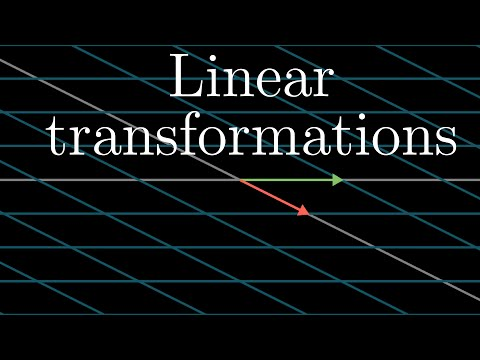

In [100]:
from IPython.display import YouTubeVideo
YouTubeVideo('kYB8IZa5AuE')

### Singular Values Decomposition ​​(SVD)

By now, you should understand that linear tranformations are special functions that map one vector to another. You should also understand that a linear transformation can always be represented by a matrix in such a way that, when we multiply this matrix by a vector the resulting vector is produced.

Formally, SVD is a way to factor a composite linear transformation represented by a matrix M into its component matrices. In particular, a matrix $M$ representing a composite linear transformatrion can be factorized: 

$$
M = \mathbf{U \times \Sigma \times V}
$$

Intuitively, SVD produces a decomposition of the original matrix $M$ into matrices that either rotate or resize the input vectors. This way, applying $M$ to a vector $\mathbf{v}$ is equivalent to applying the components matrices in sequence:

$$
M \times \mathbf{v}\equiv U \times (\Sigma \times (V \times \mathbf{v}))
$$

The following animation ([source](https://en.wikipedia.org/wiki/Singular_value_decomposition)) illustrates the mechanics of SVD. Two vectors are depicted (in yellow and red). You should see that the change in these vectors resulting from applying $M$ is the same obtained by applying $V$, $\Sigma$ and $U$ (in this order) on them.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Singular_value_decomposition.gif/280px-Singular_value_decomposition.gif)

See also the following image.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/800px-Singular-Value-Decomposition.svg.png)

NB: be aware of the chance in notation used in the above animation.

### Algorithm steps

Consider using PCA to reduce the dimensionality of the (already centralized) $X$ data matrix from $n$ to $k$. To do this, the following steps should be performed:

1. Compute $\Sigma$, the covariance matrix of $X$:

2. Compute the SVD decomposition of $\Sigma$: $[U, S, V] := \text{svd}(\Sigma)$

From this decomposition (step 2), the relevant matrix for PCA is ​​$U \in \Re^{n \times n}$. This matrix contains the main components determined by PCA.

$$
U = \begin{bmatrix}
\vert 	& \vert 	& 			& \vert \\ 
\mathbf{u}^{(1)} & \mathbf{u}^{(2)} & \dots & \mathbf{u}^{(n)}\\ 
\vert 	& \vert 	& 			& \vert 
\end{bmatrix}
$$

After identifying the principal components, it is possible to reduce the size of the data set to $k$ dimensions, projecting it on the hyperplane defined by the first $k$ principal components. Selecting this hyperplane ensures that the projection will preserve the greatest possible variance. Consider the matrix $U_{redux}$ obtained from $U$: $U_{redux}$ contains the first $k$ columns of $U$:

$$
U_{redux} = \begin{bmatrix}
\vert 	& \vert 	& 			& \vert \\ 
\mathbf{u}^{(1)} & \mathbf{u}^{(2)} & \dots & \mathbf{u}^{(k)}\\ 
\vert 	& \vert 	& 			& \vert 
\end{bmatrix}
$$

To map the vector $\mathbf{x}^{(i)} \in \Re^n$ to the vector $\mathbf{z}^{(i)} \in \Re^k$, PCA computes:
$$
\mathbf{z}^{(i)} = \begin{bmatrix}
\vert 	& \vert 	& 			& \vert \\ 
\mathbf{u}^{(1)} & \mathbf{u}^{(2)} & \dots & \mathbf{u}^{(k)}\\ 
\vert 	& \vert 	& 			& \vert 
\end{bmatrix}^T \, \mathbf{x}^{(i)}
$$




### PCA: implementation with numpy and scipy

In [99]:
import numpy as np
from scipy import linalg as LA

def pca(X, k):
    # Data centering
    mu = np.mean(X, axis = 0)
    print('Mean vector: ' + str(mu))
    centered_X = X - mu  
    print('\nCentered data matrix:\n ' + str(centered_X))

    C = np.cov(centered_X, rowvar = False)

    # SVD decomposition on the covariance matrix
    print('\n***** SVD decomposition ****')
    U, S, V = LA.svd(C)
    print('U:\n' + str(U))
    print('S:\n' + str(S))
    print('V:\n' + str(V))

    # Verifying that the eigenvectors are unit vectors
    print('\nEigenvectors norms (columns of U):')
    print(np.linalg.norm(U[:,0]), np.linalg.norm(U[:,1]), np.linalg.norm(U[:,2]))

    print('\nVariance percentages per component:\n', str(S/np.sum(S) * 100))

    # To project to k dimensions, we must compute U_redux
    U_redux = U[:, 0:k]
    print('\nU_redux:\n', str(U_redux))

    # Now, we compute Z, the matrix of projected points in k-dimensional space.
    Z = np.matmul(U_redux.T,X.T)
    print('\nProjected data matrix (k=' + str(k) + '):\n' + str(Z.T))
    
    return U_redux, Z

def restore(U_redux, Z):
    print('\nRestored data matrix:\n' + str(np.matmul(U_redux, Z).T))

In [98]:
X = np.array([
        [0.387,  4878, 5.42],
        [0.723, 12104, 5.25],
        [1,     12756, 5.52],
        [1.524,  6787, 3.94],
    ])

pca(X, 2)

**************
Mean vector: [9.08500e-01 9.13125e+03 5.03250e+00]

Centered data matrix:
 [[-5.21500e-01 -4.25325e+03  3.87500e-01]
 [-1.85500e-01  2.97275e+03  2.17500e-01]
 [ 9.15000e-02  3.62475e+03  4.87500e-01]
 [ 6.15500e-01 -2.34425e+03 -1.09250e+00]]

***** SVD decomposition ****
U:
[[-1.21901390e-05  5.66460727e-01  8.24088736e-01]
 [-9.99999997e-01  5.32639789e-05 -5.14047691e-05]
 [-7.30130279e-05 -8.24088734e-01  5.66460725e-01]]
S:
[1.51872330e+07 6.70619604e-01 2.02485956e-02]
V:
[[-1.21901390e-05 -9.99999997e-01 -7.30130279e-05]
 [ 5.66460727e-01  5.32639789e-05 -8.24088734e-01]
 [ 8.24088736e-01 -5.14047691e-05  5.66460725e-01]]

Eigenvectors norms (columns of U):
0.9999999999999998 0.9999999999999997 0.9999999999999998

Variance percentages per component:
 [9.99999955e+01 4.41567976e-06 1.33326424e-07]

U_redux:
 [[-1.21901390e-05  5.66460727e-01]
 [-9.99999997e-01  5.32639789e-05]
 [-7.30130279e-05 -8.24088734e-01]]

Projected data matrix (k=2):
[[-4.87800039e+03 -3.9

(array([[-1.21901390e-05,  5.66460727e-01],
        [-9.99999997e-01,  5.32639789e-05],
        [-7.30130279e-05, -8.24088734e-01]]),
 array([[-4.87800039e+03, -1.21040004e+04, -1.27560004e+04,
         -6.78700029e+03],
        [-3.98751895e+00, -3.27220755e+00, -3.30307377e+00,
         -2.02212084e+00]]))

In [101]:
X = np.array([
        [1,  -2, -.05],
        [2, 4, +.05],
        [4, -8, -.1],
        [8,  16, +.1],
    ])
U_redux, Z = pca(X, k=2)

restore(U_redux, Z)

Mean vector: [3.75 2.5  0.  ]

Centered data matrix:
 [[ -2.75  -4.5   -0.05]
 [ -1.75   1.5    0.05]
 [  0.25 -10.5   -0.1 ]
 [  4.25  13.5    0.1 ]]

***** SVD decomposition ****
U:
[[-0.21011096  0.97765515  0.00661783]
 [-0.97764219 -0.21004099 -0.00992594]
 [-0.00831413 -0.00855542  0.99992884]]
S:
[1.09628348e+02 4.96292646e+00 3.92101053e-04]
V:
[[-0.21011096 -0.97764219 -0.00831413]
 [ 0.97765515 -0.21004099 -0.00855542]
 [ 0.00661783 -0.00992594  0.99992884]]

Eigenvectors norms (columns of U):
1.0000000000000002 1.0 0.9999999999999999

Variance percentages per component:
 [9.56686915e+01 4.33096630e+00 3.42172398e-04]

U_redux:
 [[-0.21011096  0.97765515]
 [-0.97764219 -0.21004099]
 [-0.00831413 -0.00855542]]

Projected data matrix (k=2):
[[  1.74558913   1.3981649 ]
 [ -4.33120641   1.11471857]
 [  6.98152512   5.59180404]
 [-17.32399421   4.45972983]]

Restored data matrix:
[[ 1.0001557  -2.00023352 -0.02647493]
 [ 1.99984429  4.00023354  0.02647331]
 [ 3.99996105 -7.999941

### PCA on Scikit-Learn

In Scikit-Learn, the class [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) implements PCA. This class project point in the the input data matrix $X$ to a smaller dimensional space. The data matrix is ​​centralized, but its attributes are not resized, before applying the SVD decomposition.

```
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)
```

Instead of specifying the number of principal components to be preserved, it is possible to define `n_components` as a number between 0.0 and 1.0, to indicate the proportion of variance to be maintained:

```
from sklearn.decomposition import PCA
pca = PCA(ncomponents = 0.95)
X_reduced = pca.fit_transform(X)
```

After applying the transformer to the $X$, the principal components are stored in the variable `components_`. This variable contains PCs as horizontal vectors. So, for example, the first major component is the same as `pca.components_.T [:, 0])`.

As an example of using the class [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), consider the following two-dimensional toy dataset.

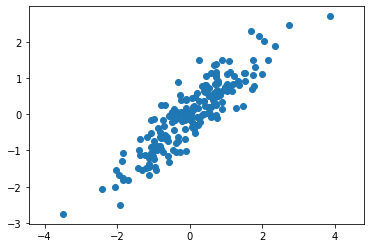

In [95]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By visually inspecting the plot presented above, you should notice that there exists a positive correlation between the two variables: greater values of one of the variables correspond to greater values of the other variable, and vice-versa. We can confirm this by inspecting the empirical covariance matrix. See the code cell below.

In [ ]:
from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(X)
print(cov.covariance_)

[[0.67876672 0.22978007]
 [0.22978007 0.09833763]]


The following code instantiates the PCA class of Scikit-Learn and invokes the `fit` method to compute the principal components for $X$.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


We can have a greater intuition about the meaning of the principal components through the following visualization.

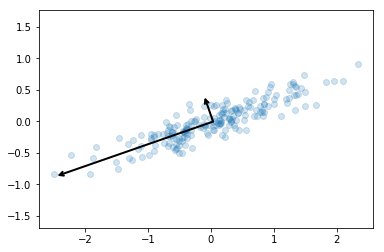

In [ ]:
# fonte: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
import matplotlib.pyplot as plt
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In the visualization presented above, the vectors represent the main axes of the data in the new coordinate system determined by PCA. In addition, the length of each vector is an indication of how "important" the corresponding axis is in the description of the data distribution. More precisely, it is a measure of the variance of the data when projected for that axis.

### PCA applications

* Reduction of memory required for data storage.

* Acceleration of learning algorithms: PCA can be applied to reduce the dimensionality of a data matrix before applying some learning algorithm. The resulting projected data matrix will usually be processed faster due to the lower number of features.

* Preview: PCA can be used as an exploratory data analysis tool. In such context, we can apply PCA to reduce a dataset to 2 or 3 dimensions, in order to visually inspect its points and get some insight.

### Finding the intrinsic dimension

An important procedure when using PCA is to estimate how many components are needed to adequately describe the data. This quantity is called [intrinsic dimension](https://en.wikipedia.org/wiki/Intrinsic_dimension) of the data set.

The intrinsic dimension can be determined by looking at the accumulated explained variance rate as a function of the number of components.

The following example uses the data set [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) to illustrate this process ([source](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)).

(1797, 64)
(1797, 2)


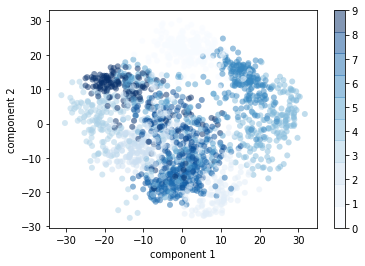

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
digits.data.shape

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

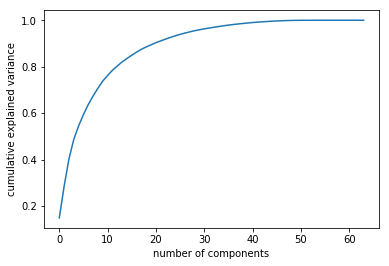

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Through the graph above, we see that the two-dimensional projection loses a lot of information (measured by the explained variance) and that we need about 20 components to retain around 90% of the variance. Looking at this graph for a large data set can help you understand the level of redundancy present in the data set.

### PCA - practical considerations

* At first, we could erroneously consider adding PCA unconditionally to the usual ML task implementation workflow. A more appropriate approach is, before applying PCA, to try the ML algorithm (s) on the original data set. If the results are unsatisfactory, consider applying PCA.

* The projection must be constructed using only the training set. After building this mapping, it can be applied to the validation and test sets.

* A weakness of the PCA is that it tends to be heavily affected by * outliers *. Therefore, it is worth an exploratory analysis to identify whether there are extreme values ​​in the data set.

* The resizing of attributes is important for the correct functioning of the PCA, as shown in the following figure. (See also [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py))

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_scaling_importance_001.png)

### Case study

In this section, we investigate a PCA application case study on the Iris data set (4D) to project it on the plane (2D space) defined by the first two principal components, preserving a large part of the data set variance.

Load the data set into a Pandas DataFrame

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

Resize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# data matrix (only features)
X = df.loc[:, features].values

# target vector
y = df.loc[:,['target']].values

# Rescaling the features
X = StandardScaler().fit_transform(X)

Invokes PCA to project the dataset to two dimensions

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Determines the intrinsic dimension of the data

[2.93035378 0.92740362 0.14834223 0.02074601]


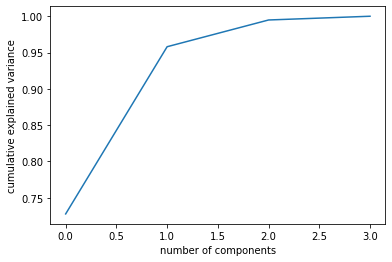

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

The next code cell plots the resulting two-dimensional data. Notice in the graph below that the classes appear well separated from each other.

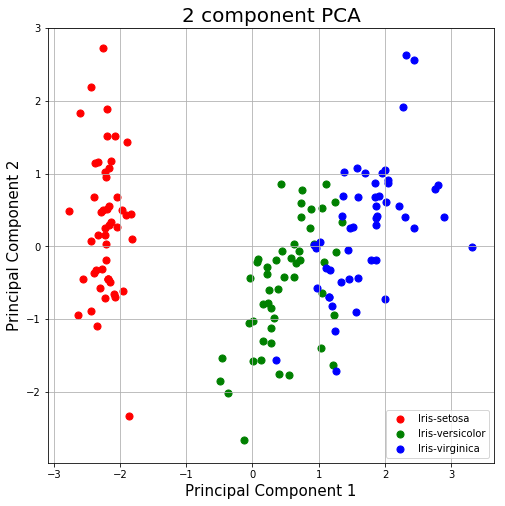

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The `explained_variance_ratio_` field of the PCA object tells you how much information (variance) can be attributed to each of the main components. When inspecting the `explained_variance_ratio_` vector, we can see that the first main component contains 72.77% of the variance, and the second main component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

You can find out how many components PCA chooses after adjusting the model using the `pca.n_components_` field.

In [ ]:
pca.n_components_

2

### Variants of PCA

Some variants of PCA have been developed. Scikit-Learn contains some implementations of these variants, including the following:

* `IncrementalPCA`. One problem with the classic PCA implementation is that it requires the entire training set to fit in memory for the SVD algorithm to run. The IncrementalPCA implementation can divide the training set into mini-batches and feed the decomposition procedure one mini-batch at a time. This is useful for large training sets.

* `RandomizedPCA`. This implementation uses a non-deterministic method to quickly approximate the first few major components in very large data. `RandomizedPCA` implements a stochastic algorithm that quickly finds an approximation of the first $k$ main components. Its computational complexity is $O(m \times k^2) + O(k^3)$. In comparison to the $O(m \times n^2) + O(n^3)$ complexity of the original version, this stochastic version is significantly faster when $k$ is much less than $n$.

The following code divides the MNIST data set into 100 mini-batches (using NumPy's `array_split()` function) and supplies them to the IncrementalPCA class to reduce the dimensionality of the MNIST data set to 154 dimensions. Note that you must call the `partial_fit()` method with each mini-batch instead of the `fit()` method with the entire training set.

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X_mnist.data.shape)

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
        inc_pca.partial_fit(X_batch)
X_mnist_reduced = inc_pca.transform(X_mnist)

print(X_mnist_reduced.shape)

(70000, 784)
(70000, 154)


The following example illustrates the use of the class `RandomizedPCA`.

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_mnist)
print(X_mnist_reduced.shape)

# Seleção de Atributos

## Seleção baseada em variância

No Scikit-Learn, a classe [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) implementa um procedimento simples para a seleção de atributos. Essa estratégia remove todos os atributos cuja variância não atinge algum limite fornecido. Por padrão, esse procedimento remove todos os atributos cuja variância é zero.

A célula a seguir (adaptada deste [exemplo](https://)) ilustra um dataset com três atributos binários. O código descarta os atributos que possuem mais de 80% de zeros (ou de uns). Repare que o primeiro atributo é descartado, visto que há uma probabilidade igual a $5/6$ (maior do que $0.8$) de encontrar um zero.

N.B.: a variância de uma variável aleatória de Bernoulli $X$ cuja probabilidade de sucesso é $p$ é dada por $\operatorname {Var} [X]=p(1-p)$.


In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

print(np.asarray(X))

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## Seleção de atributos univariada

A seleção de atributos univariada é útil para seleção de atributos no contexto da tarefa de **classificação**. Essa estratégia seleciona os melhores atributos com base em algum teste estatístico capaz de medir a dependência entre duas variáveis. 

O Scikit-learn expõe rotinas de seleção de atributos como classes que implementam o método de transformação `fit_transform`. Esse método recebe como argumentos a matrix de dados $X$ e a matriz alvo $y$.

Uma dessas rotinas é fornecida pela classe `SelectKBest`. Essa classe pode ser configurada com um dentre um conjunto de testes estatísticos diferentes para selecionar um número específico de atributos. Um dos parâmetros a ser passado é uma função de pontuação, que deve ser aplicável a um par (𝑋, 𝑦). O resultado é uma matriz de pontuações, com uma pontuação para cada atributo de 𝑋. O objeto `SelectKBest` então simplesmente mantém os primeiros $k$ atributos de 𝑋 com as pontuações mais altas.

Se, por exemplo, for passada `chi2` como função de pontuação, `SelectKBest` irá calcular a estatística `chi2` entre cada atributo de 𝑋 e o atributo alvo 𝑦 (presumindo que este último contém os rótulos da classe). Um valor pequeno significará que o atributo é independente de 𝑦. Um valor grande significará que o atributo não está relacionado aleatoriamente a 𝑦 e, portanto, provavelmente fornecerá informações importantes para o estimador. Apenas os 𝑘 atributos de maior pontuação são mantidos.

O exemplo abaixo ilustra o uso de `SelectKBest` com o teste estatístico qui quadrado ($\chi^2$) para selecionar os melhores 4 atributos do conjunto de dados de original.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)

(150, 4)
(150, 2)


### Seleção por informação mútua

A [informação mútua](https://en.wikipedia.org/wiki/Mutual_information) (mutual information, MI) entre duas variáveis aleatórias é um valor não negativo, que mede a dependência entre as variáveis. É igual a zero se e somente se duas variáveis aleatórias forem independentes. Quanto maior o valor de MI, maior a dependência estatística entre as variáveis. 

Formalmente,  dadas duas variáveis aleatórias $X$ e $Y$, a MI mede o quão diferente a distribuição conjunta do par ${\displaystyle (X, Y)}$ é do produto de distribuições marginais de ${\displaystyle X}$ e ${\displaystyle Y}$.

Intuitivamente, MI mede o quanto o conhecimento de uma dessas variáveis reduz a incerteza sobre a outra. Por exemplo, se ${\displaystyle X}$ e ${\displaystyle Y}$ forem independentes, saber ${\displaystyle X}$ não fornecerá informações sobre ${\displaystyle Y}$ e vice-versa. Portanto, a informação mútua neste caso é zero. No outro extremo, se ${\displaystyle X}$ é uma função determinística de ${\displaystyle Y}$ e ${\displaystyle Y}$ é uma função determinística de ${\displaystyle X}$, então toda a informação transmitida por ${\displaystyle X }$ é compartilhada com ${\displaystyle Y}$: conhecer ${\displaystyle X}$ determina o valor de ${\displaystyle Y}$ e vice-versa.

A MI não está limitada a variáveis aleatórias de valor real e nem a dependências lineares (como acontece no caso do coeficiente de correlação).

No Scikit-Learn, a função [sklearn.feature_selection.mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) permite estimar a *informação mútua* entre cada atributo previsor e um atributo alvo discreto.


In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
X = np.array([[0, 0, 0, 1],
              [1, 1, 0, 2],
              [2, 0, 1, 3],
              [2, 0, 1, 3],
              [1, 0, 1, 2]])
y = np.array([0, 1, 2, 2, 1])
mutual_info_classif(X, y, discrete_features=True)

array([1.05492017, 0.22314355, 0.39575279, 1.05492017])

In [ ]:
print(X[:,0])

[0 1 2 2 1]


As duas células a seguir ilustram de que forma a computação da MI pode ser implementada. Para entendimento deste código, vale a leitura do link a seguir: https://en.wikipedia.org/wiki/G-test#Relation_to_mutual_information.

In [ ]:
import numpy as np
x = np.array([1, 2, 0, 0, 2])
y = np.array([0, 1, 2, 2, 1])
bins = 3
c_xy = np.histogram2d(x, y, bins)[0]
print(c_xy)

[[0. 0. 2.]
 [1. 0. 0.]
 [0. 2. 0.]]


In [ ]:
from scipy.stats import chi2_contingency

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    return mi
calc_MI(X[:,0], y, 3)

1.0549201679861442

A classe `SelectPercentile` funciona de forma similar. Essa classe também deve ser configurada com uma função de pontuação. Entretanto, em vez de passar a *quantidade* de atributos que devem permanecer, passamos a *porcentagem* de atributos que devem permanecer (relativamente à quantidade total de atributos em $X$).

No exemplo a seguir, $X$ contém 64 atributos. Após a seleção (repare o uso do parâmetro `percentile` para definir que 10% dos atributos devem ser retidos), o conjunto de dados contém apenas 7 atributos.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
print('Antes da seleção:', X.shape)

X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
print('Depois da seleção:', X_new.shape)

Antes da seleção: (1797, 64)
Depois da seleção: (1797, 7)


## Recursive Feature Elimination

A estratégia *Recursive Feature Elimination*, implementada na classe [sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) utiliza algum algoritmo de ML que gere modelos preditivos (classificador ou regressor) para selecionar atributos. Essa estratégia é útil em tarefas de classificação ou de regressão, nas quais há um conjunto de atributos previsores e um atributo alvo. A RFE permite selecionar os atributos previsores mais relevantes para predizer o atributo alvo.

O RFE ajusta um modelo preditivo (classificador ou regressor) a diferentes combinações de atributos. Para cada combinação, ele usa a acurácia do modelo ajustado para identificar quais atributos contribuem mais para prever o atributo alvo. Sendo assim, uma pressuposição para aplicar o RFE é que o algoritmo usado para ajuste do modelo a um conjunto de dados $X$ produz um peso (i.e., um indicador numérido de importância) para cada atributo em $X$. 

Inicialmente, o algoritmo de ML é aplicado ao conjunto de dados original $X$. Em seguida, o atributo menos relevante (de acordo com os coeficientes retornados pelo modelo ajustado) é removido de $X$, o que resulta em um novo conjunto de dados $X^\prime$. Um novo modelo é então ajustado sobre novo conjunto de dados $X^\prime$, para gerar uma nova lista de coeficientes de importância. Esse procedimento é realizado recursivamente, até que a quantidade de atributos desejada seja alcançada.

A classe `RFE` possui dois atributos, `support_` e `ranking_`, vetores (do tipo *numpy array*) que podem ser consultados para analisar o resultado da seleção de atributos.

No código de exemplo abaixo, o conjunto de dados Iris é usado para ilustrar o uso de RFE. O conjunto de dados Iris tem 4 atributos previsores, todos medidos em cm:
* comprimento da sépala, 
* largura da sépala, 
* comprimento da pétala, 
* largura da pétala. 

No exemplo  abaixo, o vetor `ranking_` resultante é `[2 1 1 1]`, o que significa que a largura da sépala, o comprimento da pétala e a largura da pétala são todos mais importantes do que o comprimento da sépala.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets

dataset = datasets.load_iris()

svm = LinearSVC()

# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, n_features_to_select=3)
rfe = rfe.fit(dataset.data, dataset.target)

#
# imprime sumários relativos aos atributos selecionados
#

# um array com valores booleanos para indicar os atributos selecionados
print(rfe.support_)

# um array de inteiros positivos para indicar o ranking de atributos
# (pontuação mais baixa indica um ranking mais alto) 
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

print(selector.support_)


print(selector.ranking_)


[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]


Outra classe do scikit-learn fornecida para seleção de atributos é [`RFECV`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).  Essa é uma sublcasse de RFE.

Uma desvantagem da classe RFE é que a quantidade de atributos a selecionar deve ser fornecida por meio do parâmetro `n_features_to_select`. A classe RFECV ajuda a ajustar (i.e., determinar) o valor desse parâmetro usando validação cruzada. Para cada etapa em que o número de atributos definido em `steps` é eliminado, a RFECV calcula a acurácia em um conjunto de dados de validação. A combinação de atributos que fornece a acurácia máxima nos dados de validação é retornada.

In [ ]:
from sklearn.feature_selection import RFECV
regression = SVR(kernel="linear")
selector = RFECV(estimator=regression, cv=10)
selector.fit(X, y)
print("Quantidade ótima de atributos: %d" % selector.n_features_)

Quantidade ótima de atributos: 5


In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_ 


selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

Automatically created module for IPython interactive environment
Optimal number of features : 3


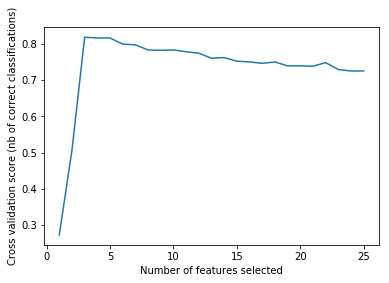

In [ ]:
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv('./breast-cancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


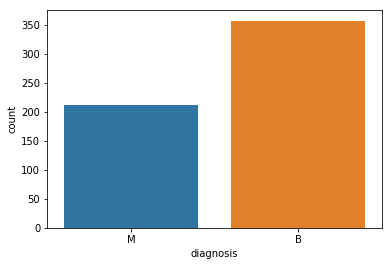

In [ ]:
import seaborn as sns
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

## SelectFromModel

A classe [sklearn.feature_selection.SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) pode ser usada com qualquer estimador que tenha campos `coef_` ou `feature_importances_`. Os atributos considerados sem importância são aqueles cujos correspondentes em `coef_` (ou em `feature_importances_`) estiverem abaixo do parâmetro de limite fornecido (`threshold`).

<center>`threshold : string, float, optional default None`</center>

> *The threshold value to use for feature selection. Features whose importance is greater or equal are kept while the others are discarded. If “median” (resp. “mean”), then the threshold value is the median (resp. the mean) of the feature importances. A scaling factor (e.g., “1.25*mean”) may also be used. If None and if the estimator has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso), the threshold used is 1e-5. Otherwise, “mean” is used by default.*


In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
import seaborn as sns
import numpy as np

df_iris = sns.load_dataset('iris')

y = df_iris['species'] # atributo alvo 
X = df_iris.drop('species', axis=1) # remove atributo alvo da matrix de dados 
clf = ExtraTreesClassifier(n_estimators=250)
clf = clf.fit(X, y)

print('Atributos previsores:', X.columns)
print('Importâncias:', clf.feature_importances_)

print('Média das importâncias:', np.mean(clf.feature_importances_))

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

feature_idx = model.get_support().astype(int)

feature_idx = np.argwhere(feature_idx==1)

feature_name = df_iris.columns[feature_idx]

print('Atributos selecionados:', feature_name)

Atributos previsores: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Importâncias: [0.10385294 0.05613477 0.36595459 0.4740577 ]
Média das importâncias: 0.25
Atributos selecionados: Index([['petal_length'], ['petal_width']], dtype='object')


O próximo exemplo é retirado da própria documentação do scikit-learn ([Feature importances with forests of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py))

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


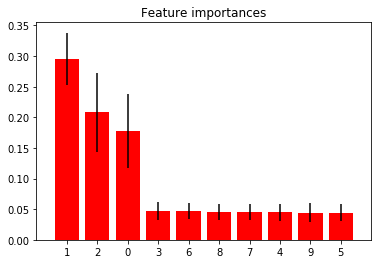

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## RFE vs SelectFromModel 

As estratégias de seleção de atributos implementadas em RFE e SelectFromModel têm o mesmo propósito, a saber, selecionar um conjunto de atributos relevantes para uma tarefa de predição, mas a metodologia usada em cada técnica varia, conforme descrito a seguir.

* `RFE` remove atributos menos relevantes de forma iterativa: primeiro remove alguns atributos que não são importantes e, em seguida, ajusta novo modelo e remove novamente outros atributos e ajusta novo modelo. Essa estratégia repete essa iteração até atingir um número pré-estabelecido de atributos.

* `SelectFromModel` apenas remove atributos menos importantes com base em um limite fornecido como um parâmetro. Não há iteração envolvida.

# Exercícios

**1** - Considere que a matrix de dados abaixo corresponde a notas de 5 estudantes, nas disciplinas Matemática, Português e Artes. Construa a matriz de covariâncias correspondente à matriz de dados fornecida. Qual o teste que possui maior variância? Qual par de disciplinas está mais correlacionado?
$$
\begin{matrix} 
90 & 60 & 90 \\ 
90 & 90 & 30 \\ 
60 & 60 & 60  \\
60 & 60 & 90 \\ 
30 & 30 & 30 \\ 
\end{matrix}
$$

**2** - Neste exercício, considere a implementação em PCA em numpy e scipy fornecida. O que você espera que os conjuntos de dados projetados sejam para a matriz de dados $X1$ fornecida abaixo? Explique os resultados para $k = 3$ e $k = 1$.

```
X1 = np.array([
        [1,   2, -.05],
        [2,   4, -.05],
        [4,   8, -.05],
        [8,  16, -.05],
    ])
pca(X=X1, k=3)
pca(X=X1, k=1)
```


**3** - Considere o conjunto de dados [MNIST](https://en.wikipedia.org/wiki/MNIST_database), composto de imagens de dígitos de 28x28 pixels. A dimensão original deste conjunto de dados é 784. Utilizando a abordagem de plotar a soma acumulada das variâncias explicadas, determine a dimensão intrínseca desse conjunto de dados. Abaixo, é fornecido o código para carregar o conjunto de dados. 

```
# Load data from https://www.openml.org/d/554
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X_mnist.data.shape)
```

**4** - Considere o conjunto de dados PIMA Indians (fornecido como arquivo em formato CSV). Use as abordagens de seleção de atributos univariada e RFE para determinar quais os atributos mais relevantes relativamente ao atributo alvo.


